# Conditional Neural Processes (CNP) for Coherent.
[Conditional Neural Processes](https://arxiv.org/pdf/1807.01613.pdf) (CNPs) were
introduced as a continuation of
[Generative Query Networks](https://deepmind.com/blog/neural-scene-representation-and-rendering/)
(GQN) to extend its training regime to tasks beyond scene rendering, e.g. to
regression and classification.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import datetime
import numpy as np
import os
from resum.utilities import plotting_utils_cnp as plotting
from resum.utilities import utilities as utils
from resum.conditional_neural_process import DataGeneration
from resum.conditional_neural_process import DeterministicModel
from torch.utils.tensorboard import SummaryWriter
import shap
import yaml

IPython could not be loaded!


In [3]:
with open("../coherent/settings.yaml", "r") as f:
    config_file = yaml.safe_load(f)

TRAINING_EPOCHS = int(config_file["cnp_settings"]["training_epochs"]) # Total number of training points: training_iterations * batch_size * max_content_points
PLOT_AFTER = int(config_file["cnp_settings"]["plot_after"])
torch.manual_seed(0)
BATCH_SIZE = config_file["cnp_settings"]["batch_size_train"]
FILES_PER_BATCH = config_file["cnp_settings"]["files_per_batch_train"]
target_range = config_file["simulation_settings"]["target_range"]
is_binary = target_range[0] >= 0 and target_range[1] <= 1

path_out = config_file["path_settings"]["path_out_cnp"]
version = config_file["path_settings"]["version"]

In [4]:
x_size, y_size = utils.get_feature_and_label_size(config_file)

Data Augmentation in Progress: Applying transformations...


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:08<00:00,  1.05s/it]


2025-07-01 07:24:54 Iteration: 0/0, train loss: 0.7765 (vs BCE 0.6979)
2025-07-01 07:24:54, Iteration: 0, test loss: 0.8409 (vs BCE 0.7394)


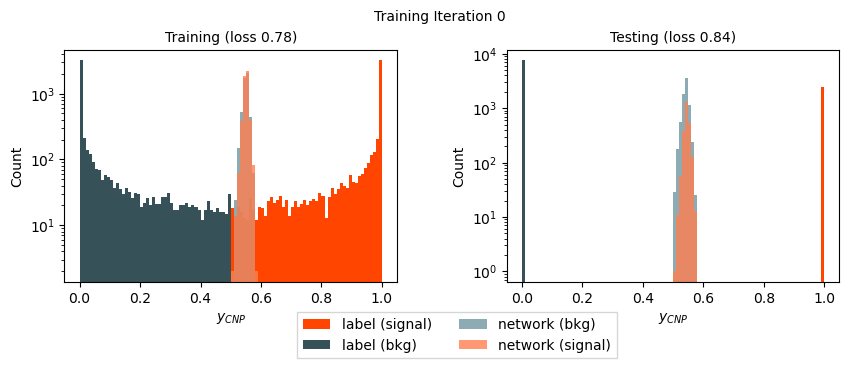

Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:12<00:00,  1.55s/it]


Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:09<00:00,  1.18s/it]


Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:12<00:00,  1.55s/it]


2025-07-01 07:25:49 Iteration: 3/200, train loss: 0.6820 (vs BCE 0.5067)
2025-07-01 07:25:49, Iteration: 200, test loss: 0.6954 (vs BCE 0.4191)


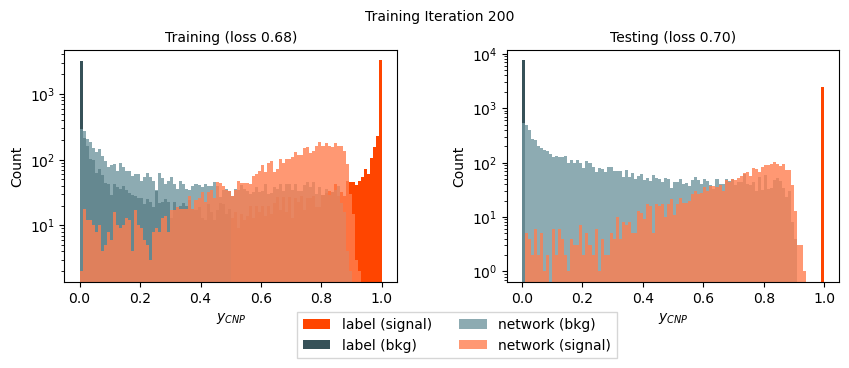

Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:08<00:00,  1.07s/it]


Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:09<00:00,  1.19s/it]


Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:09<00:00,  1.19s/it]


2025-07-01 07:26:36 Iteration: 6/400, train loss: 0.6755 (vs BCE 0.4879)
2025-07-01 07:26:36, Iteration: 400, test loss: 0.6894 (vs BCE 0.4009)


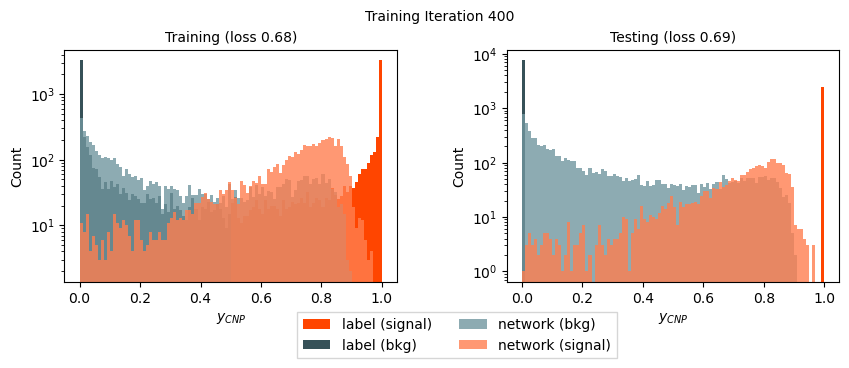

Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:09<00:00,  1.14s/it]


Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


2025-07-01 07:27:22 Iteration: 9/600, train loss: 0.6702 (vs BCE 0.4795)
2025-07-01 07:27:22, Iteration: 600, test loss: 0.6865 (vs BCE 0.3937)


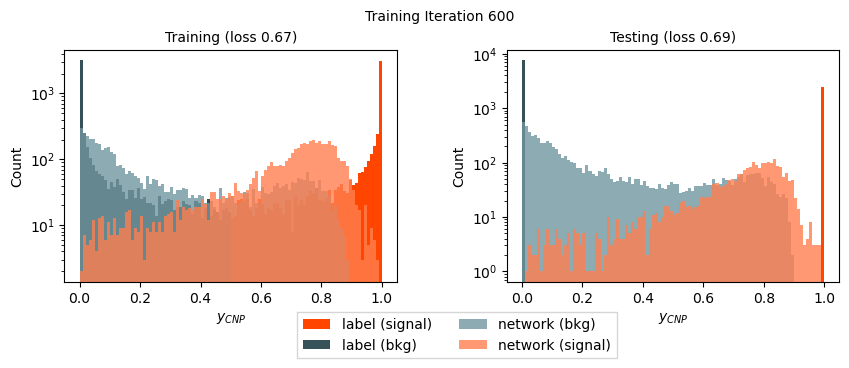

Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:07<00:00,  1.04it/s]


Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:10<00:00,  1.28s/it]


2025-07-01 07:28:16 Iteration: 12/800, train loss: 0.6695 (vs BCE 0.4744)
2025-07-01 07:28:16, Iteration: 800, test loss: 0.6787 (vs BCE 0.3739)


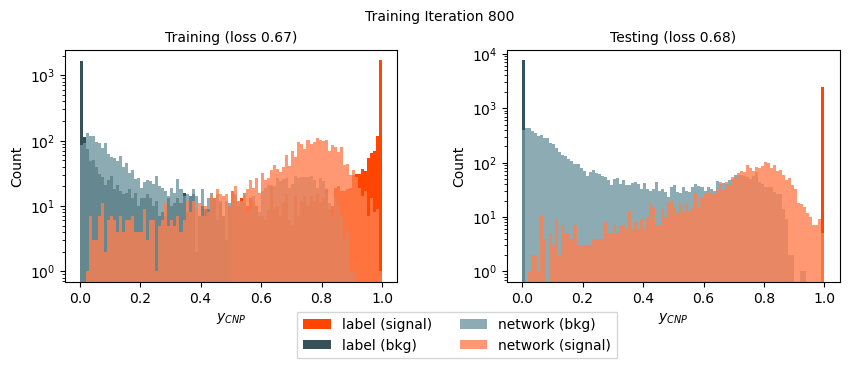

Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:10<00:00,  1.32s/it]


Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:09<00:00,  1.14s/it]


Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:10<00:00,  1.34s/it]


Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:09<00:00,  1.20s/it]


2025-07-01 07:29:17 Iteration: 16/1000, train loss: 0.6664 (vs BCE 0.4676)
2025-07-01 07:29:17, Iteration: 1000, test loss: 0.6760 (vs BCE 0.3670)


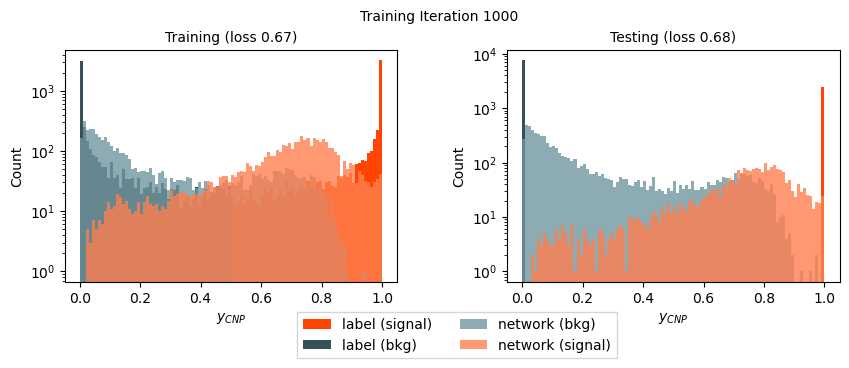

Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:08<00:00,  1.05s/it]


Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


Finished full dataset pass. Starting new epoch! 
Data Augmentation in Progress: Applying transformations...


100%|██████████| 8/8 [00:09<00:00,  1.17s/it]


2025-07-01 07:30:03 Iteration: 19/1200, train loss: 0.6599 (vs BCE 0.4481)
2025-07-01 07:30:03, Iteration: 1200, test loss: 0.6768 (vs BCE 0.3686)


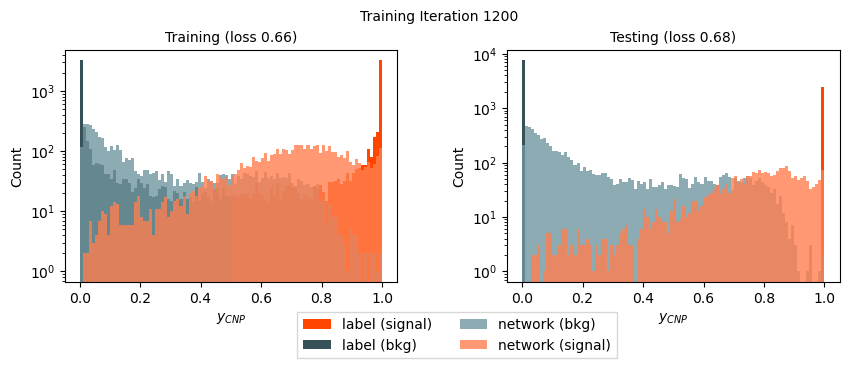

Finished full dataset pass. Starting new epoch! 


In [6]:

d_x, d_in, representation_size, d_out = x_size , x_size+y_size, 32, y_size*2
encoder_sizes = [d_in, 32, 64, 128, 128, 128, 64, 48, representation_size]
decoder_sizes = [representation_size + d_x, 32, 64, 128, 128, 128, 64, 48, d_out]

model = DeterministicModel(encoder_sizes, decoder_sizes)
writer = SummaryWriter(log_dir=f'{path_out}/cnp_{version}_tensorboard_logs')

optimizer = optim.Adam(model.parameters(), lr=1e-4)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
# 

bce = nn.BCELoss()
iter_testing = 0

# create a PdfPages object
test_idx=0
it_batch = 0
for it_epoch in range(TRAINING_EPOCHS):
    
    USE_DATA_AUGMENTATION = config_file["cnp_settings"]["use_data_augmentation"]
    # load data:
    dataset_train = DataGeneration(mode = "training", 
                                   config_file=config_file, 
                                   path_to_files=config_file["path_settings"]["path_to_files_train"], 
                                   use_data_augmentation=USE_DATA_AUGMENTATION, 
                                   batch_size=BATCH_SIZE,
                                   files_per_batch=FILES_PER_BATCH)
    dataset_train.set_loader()
    dataloader_train = dataset_train.dataloader

    dataset_test = DataGeneration(mode = "training", 
                                  config_file=config_file, 
                                  path_to_files=config_file["path_settings"]["path_to_files_train"], 
                                  use_data_augmentation=False, 
                                  batch_size=BATCH_SIZE,
                                  files_per_batch=FILES_PER_BATCH)
    dataset_test.set_loader()
    dataloader_test = dataset_test.dataloader
    data_iter = iter(dataloader_test)

    #it_batch = 0
    
    for b, batch in enumerate(dataloader_train):
        batch_formated=dataset_train.format_batch_for_cnp(batch,config_file["cnp_settings"]["context_is_subset"] )
        # Get the predicted mean and variance at the target points for the testing set
        log_prob, mu, _ = model(batch_formated.query, batch_formated.target_y, is_binary)
        
        # Define the loss
        loss = -log_prob.mean()
        loss.backward()

        # Perform gradient descent to update parameters
        optimizer.step()
    
        # reset gradient to 0 on all parameters
        optimizer.zero_grad()
        
        if is_binary:
            loss_bce = bce(mu, batch_formated.target_y)
        else:
            loss_bce=-1
        
        # Inside your batch loop, right after computing losses:
        writer.add_scalar('Loss/train_logprob', loss.item(), it_batch)
        if is_binary:
            writer.add_scalar('Loss/train_BCE', loss_bce.item(), it_batch)

        
        mu=mu[0].detach().numpy()
        
        if it_batch % PLOT_AFTER == 0:
            batch_testing = next(data_iter)
            batch_formated_test=dataset_test.format_batch_for_cnp(batch_testing,config_file["cnp_settings"]["context_is_subset"] )
          
            print('{} Iteration: {}/{}, train loss: {:.4f} (vs BCE {:.4f})'.format(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),it_epoch, it_batch,loss, loss_bce))
            
            writer.add_scalar('Loss/train_logprob', loss.item(), iter_testing)
            if is_binary:
                writer.add_scalar('Loss/train_BCE', loss_bce.item(), iter_testing)

            log_prob_testing, mu_testing, _ = model(batch_formated_test.query, batch_formated_test.target_y, is_binary)
            loss_testing = -log_prob_testing.mean()
            

            if is_binary:
                loss_bce_testing = bce(mu_testing,  batch_formated_test.target_y)
            else:
                loss_bce_testing = -1.

            writer.add_scalar('Loss/test_logprob', loss_testing.item(), test_idx)
            if is_binary:
                writer.add_scalar('Loss/test_BCE', loss_bce_testing.item(), test_idx)

            mu_testing = mu_testing[0].detach().numpy()
            print("{}, Iteration: {}, test loss: {:.4f} (vs BCE {:.4f})".format(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), it_batch, loss_testing, loss_bce_testing))
            if y_size ==1:
                fig = plotting.plot(mu, batch_formated.target_y[0].detach().numpy(), f'{loss:.2f}', mu_testing, batch_formated_test.target_y[0].detach().numpy(), f'{loss_testing:.2f}', target_range, it_batch)
                writer.add_figure('Prediction/train_vs_test', fig, global_step=test_idx)
            else:
                for k in range(y_size):
                    fig = plotting.plot(mu[:,k], batch_formated.target_y[0].detach().numpy()[:,k], f'{loss:.2f}', mu_testing[:,k], batch_formated_test.target_y[0].detach().numpy()[:,k], f'{loss_testing:.2f}', target_range, it_batch)
                    writer.add_figure(f'Prediction/train_vs_test_k{k}', fig, global_step=test_idx)
            test_idx+=1
    
        it_batch+=1

writer.close()
torch.save(model.state_dict(), f'{path_out}/cnp_{version}_model.pth')
